In [27]:
# Parameters for a financial analysis simulation of a potential investment opportunity.

grovalue = [0,0.9,1.1,1.2] 
probabilities = [0.02,0.1,0.78,0.1] 
rate=0.1 
cost= 1000000 
cf1= 90000 
life= 20 
n = 10000 # length of simulations

In [28]:
import numpy as np
import pandas as pd 
n = 10000


tableofgrowth=np.array([np.random.choice(grovalue, 19, p=probabilities) for i in range(n)])
cashflows= cf1*np.ones((n,life))
    

for i in range(n):
    for j in range(1,life):
        cashflows[i,j]=cashflows[i,j-1]*tableofgrowth[i,j-1]
        

print(cashflows[0:5,:])  

[[ 90000.         108000.         118800.         106920.
  117612.         129373.2        142310.52       156541.572
  172195.7292     189415.30212    208356.832332   229192.5155652
  252111.76712172 277322.94383389 305055.23821728 274549.71439555
  329459.65727466 296513.6915472  326165.06070192 358781.56677211]
 [ 90000.          81000.          89100.          98010.
  107811.          97029.9        106732.89       128079.468
  140887.4148     154976.15628    185971.387536   204568.5262896
  225025.37891856 247527.91681042 272280.70849146 245052.63764231
  269557.90140654 296513.6915472  266862.32239248 293548.55463173]
 [ 90000.          99000.         108900.         119790.
  131769.         144945.9        159440.49       191328.588
  210461.4468     231507.59148    254658.350628   305590.0207536
  336149.02282896 369763.92511186 406740.31762304 447414.34938535
  492155.78432388 541371.36275627 649645.63530752 714610.19883828]
 [ 90000.         108000.          97200.        

Text(0.5, 1.0, 'Distribution of IRRs')

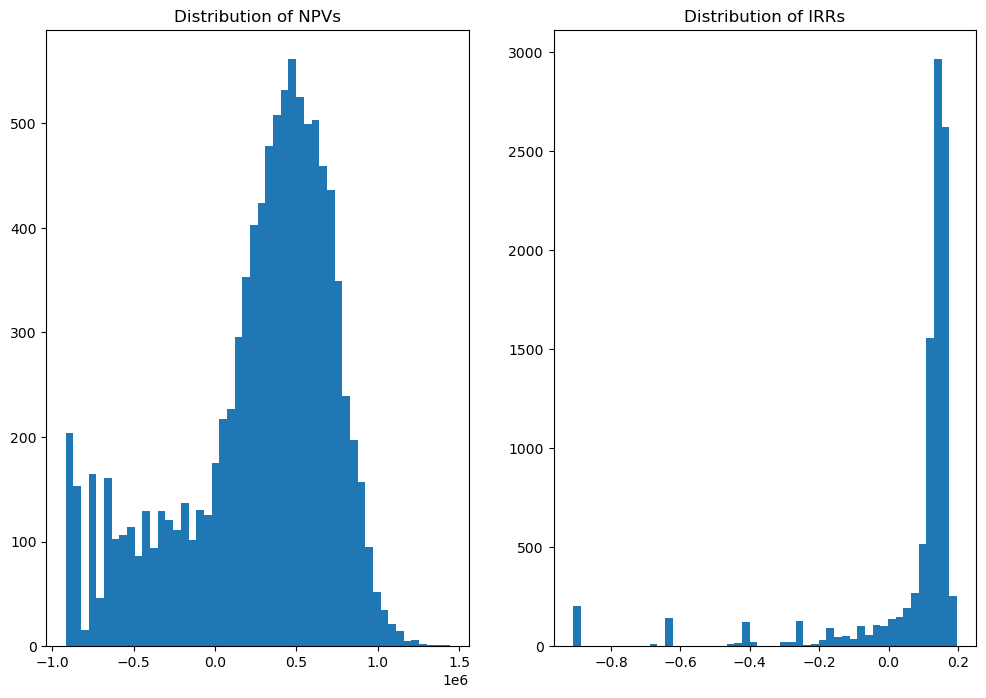

In [29]:
rate= 0.1;
import numpy_financial as npf

results=[[npf.npv(rate, row).round(2),npf.irr(row)] 
         for row in [np.concatenate(([-cost],cashflows[j,:]),axis=None) for j in range(n)]]

npv=[item[0] for item in results]
irr=[item[1] for item in results]

import matplotlib.pyplot as plt 
%matplotlib inline 

fig, axs  = plt.subplots(1,2,figsize=(12, 8))

axs[0].hist(npv, bins=50)
axs[0].set_title("Distribution of NPVs")
axs[1].hist(irr, bins=50)
axs[1].set_title("Distribution of IRRs")

In [26]:


Ecf=np.mean(cashflows, axis=0)

Ecf0=np.concatenate(([-cost],Ecf),axis=None)
npv0=npf.npv(rate, Ecf0)
irr0=100*npf.irr(Ecf0)

print('The project\'s NPV is %.2f' %npv0)
print('The project\'s IRR is %.2f percent' %irr0)

The project's NPV is -323501.10
The project's IRR is 4.54 percent
